In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('car data (2).csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# EDA

In [3]:
df.shape

(301, 9)

In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [59]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [60]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [61]:
df[input(" ")].unique()

 Present_Price


array([ 5.59 ,  9.54 ,  9.85 ,  4.15 ,  6.87 ,  9.83 ,  8.12 ,  8.61 ,
        8.89 ,  8.92 ,  3.6  , 10.38 ,  9.94 ,  7.71 ,  7.21 , 10.79 ,
        5.09 ,  7.98 ,  3.95 ,  5.71 ,  8.01 ,  3.46 ,  4.41 ,  4.99 ,
        5.87 ,  6.49 ,  5.98 ,  4.89 ,  7.49 ,  9.95 ,  8.06 ,  7.74 ,
        7.2  ,  2.28 ,  3.76 ,  7.87 ,  3.98 ,  7.15 ,  2.69 , 12.04 ,
        9.29 , 30.61 , 19.77 , 10.21 , 15.04 ,  7.27 , 18.54 ,  6.8  ,
       35.96 , 18.61 ,  7.7  , 36.23 ,  6.95 , 23.15 , 20.45 , 13.74 ,
       20.91 ,  6.76 , 12.48 ,  8.93 , 14.68 , 12.35 , 22.83 , 14.89 ,
        7.85 , 25.39 , 13.46 , 23.73 , 92.6  ,  6.05 , 16.09 , 13.7  ,
       22.78 , 18.64 ,  1.9  ,  1.82 ,  1.78 ,  1.6  ,  1.47 ,  2.37 ,
        3.45 ,  1.5  ,  2.4  ,  1.4  ,  1.26 ,  1.17 ,  1.75 ,  0.95 ,
        0.8  ,  0.87 ,  0.84 ,  0.82 ,  0.81 ,  0.74 ,  1.2  ,  0.787,
        0.99 ,  0.94 ,  0.826,  0.55 ,  0.88 ,  0.51 ,  0.52 ,  0.54 ,
        0.73 ,  0.83 ,  0.64 ,  0.72 ,  1.05 ,  0.57 ,  0.48 ,  0.58 ,
      

In [62]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

# PreProcessing 

In [5]:
final_dataset=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [6]:
final_dataset

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [7]:
final_dataset['current_year']=2021

In [8]:
final_dataset

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2021
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2021
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2021
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2021


In [9]:
final_dataset['No_of_years']=final_dataset['current_year'] - final_dataset['Year']

In [10]:
final_dataset

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,No_of_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2021,5
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2021,6
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2021,12
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2021,4


In [11]:
final_dataset.drop(['Year','current_year'],axis=1,inplace=True)

In [12]:
final_dataset

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,5
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,6
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,12
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,4


# chamatkari code hai guru

In [13]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [14]:
final_dataset

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,5,1,0,0,1
297,4.00,5.90,60000,0,6,0,1,0,1
298,3.35,11.00,87934,0,12,0,1,0,1
299,11.50,12.50,9000,0,4,1,0,0,1


# Multivariate Analysis

In [66]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_of_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


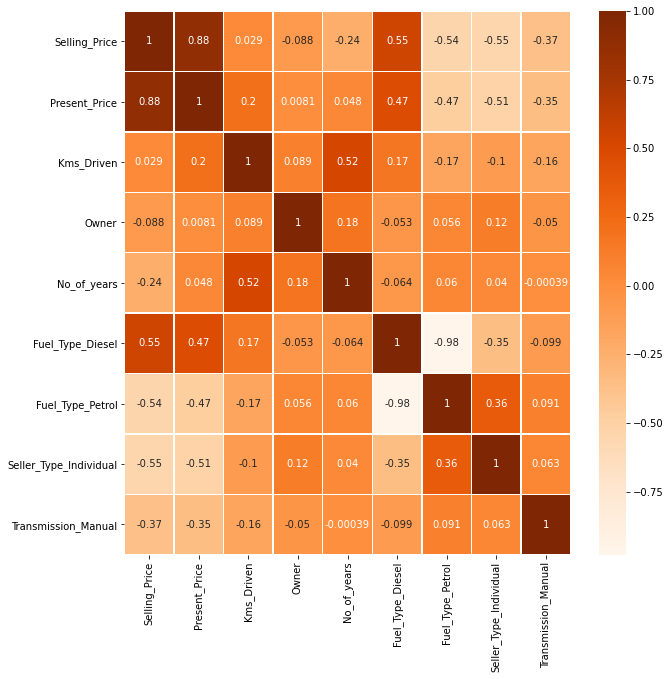

In [65]:
corrmat=final_dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="Oranges",linewidth=.5)

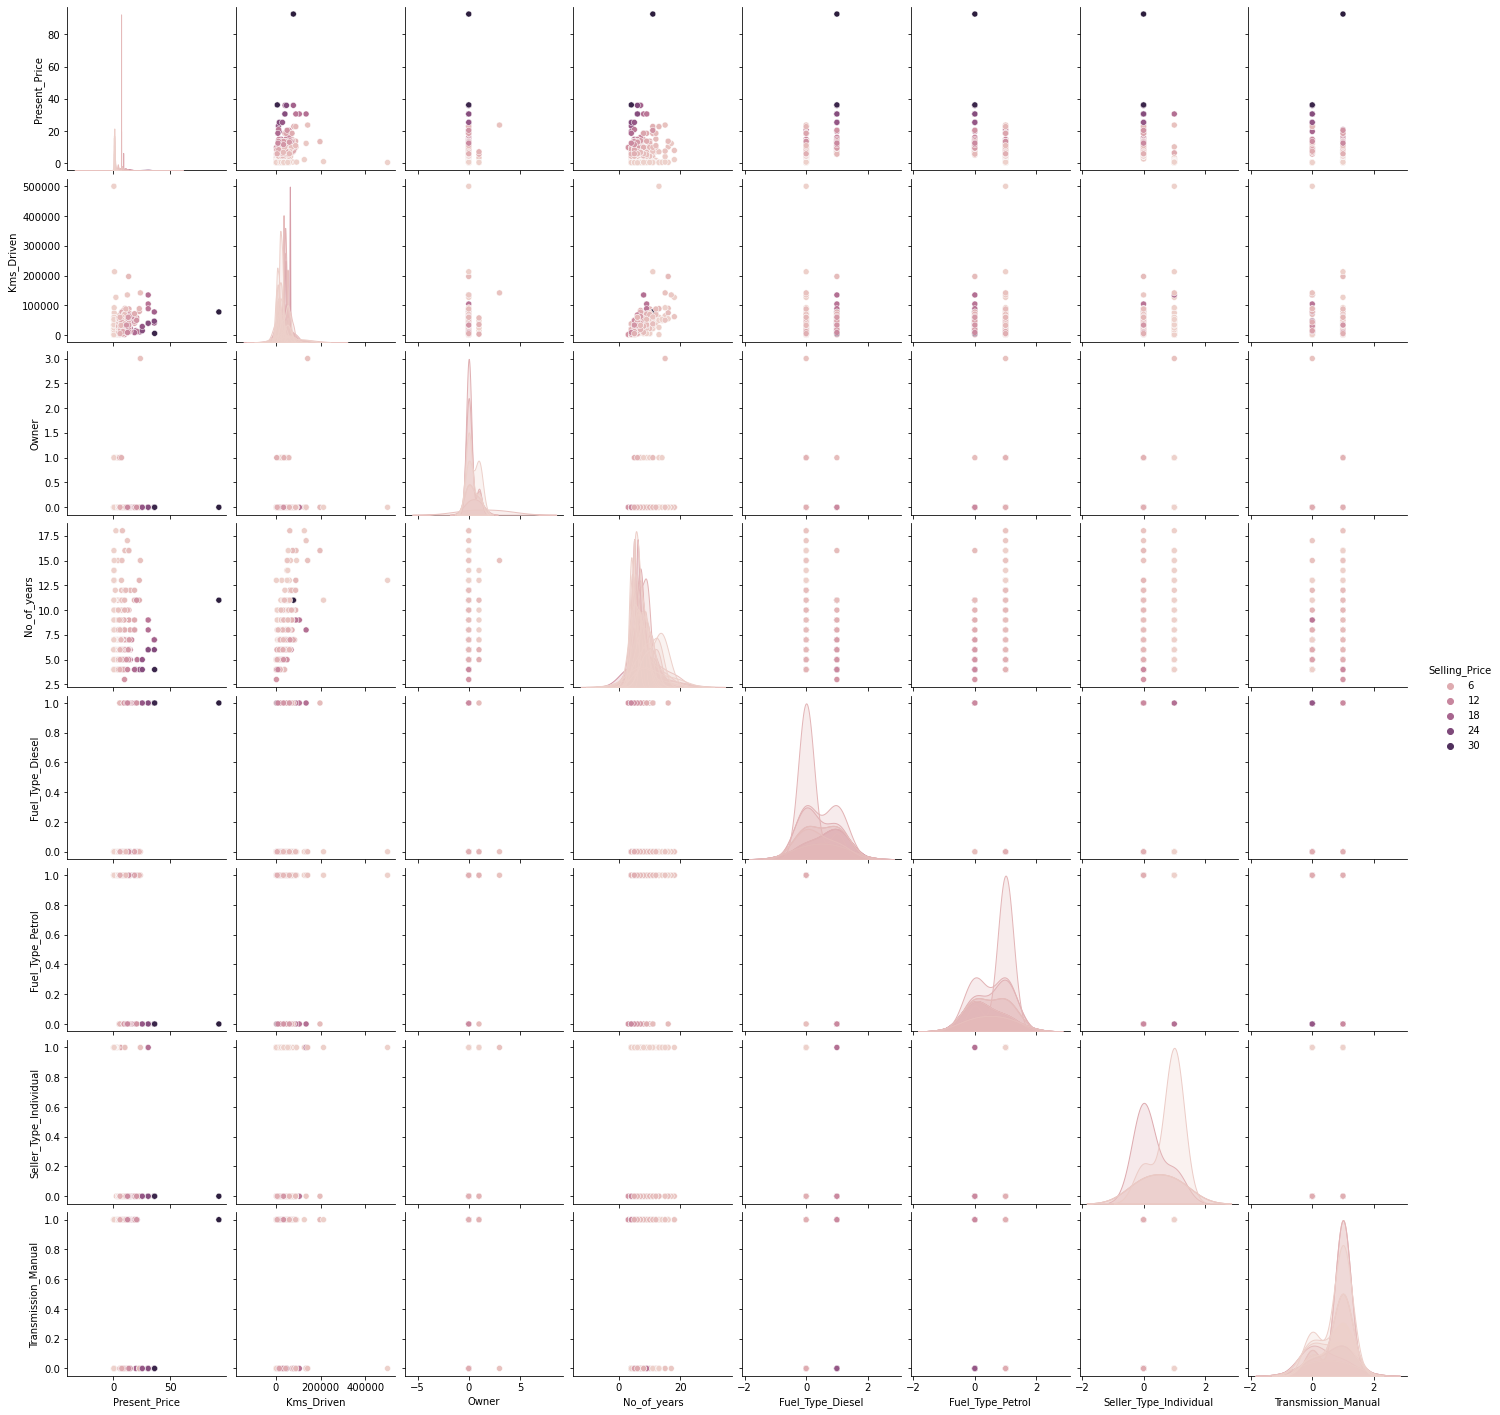

In [17]:
sns.pairplot(final_dataset,hue='Selling_Price')

(array([[301.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [301.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [230.,  63.,   5.,   1.,   1.,   0.,   0.,   0.,   0.,   1.],
        [301.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [301.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [301.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [301.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [301.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [301.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000., 450000., 500000.]),
 <a list of 9 BarContainer objects>)

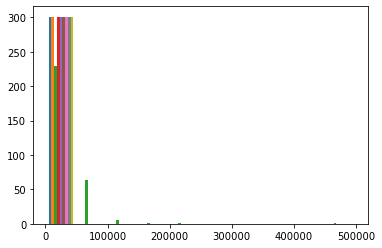

In [18]:
plt.hist(final_dataset)

# Splitting the dataset

In [19]:
x=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [20]:
print(x)

     Present_Price  Kms_Driven  Owner  No_of_years  Fuel_Type_Diesel  \
0             5.59       27000      0            7                 0   
1             9.54       43000      0            8                 1   
2             9.85        6900      0            4                 0   
3             4.15        5200      0           10                 0   
4             6.87       42450      0            7                 1   
..             ...         ...    ...          ...               ...   
296          11.60       33988      0            5                 1   
297           5.90       60000      0            6                 0   
298          11.00       87934      0           12                 0   
299          12.50        9000      0            4                 1   
300           5.90        5464      0            5                 0   

     Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                   1                       0                    1

In [21]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [22]:
# Not relevant but good to know code 
from sklearn.ensemble import ExtraTreesRegressor

In [23]:
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [24]:
print(model.feature_importances_)

[3.97887175e-01 3.99830235e-02 3.20872952e-04 8.13549556e-02
 2.11009934e-01 1.14092745e-02 1.41549438e-01 1.16485326e-01]


Bar or Barh	barh


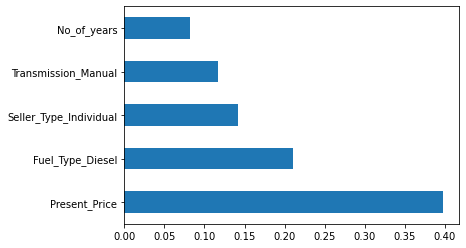

In [25]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind=input('Bar or Barh\t'))
plt.show()

In [26]:
# from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123,test_size=.3)

# Implementing Linear Regression concept

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model1=LinearRegression()

In [30]:
model1.fit(x_train,y_train)

LinearRegression()

In [31]:
print(model1.coef_)

[ 4.45185090e-01 -3.17591005e-05 -7.88778770e-01 -2.54259436e-01
  2.55491642e+00  5.92603026e-01 -1.56832608e+00 -1.52991865e+00]


In [32]:
y_pred=model1.predict(x_test)

In [33]:
print(y_pred)

[ 3.77801805e+00  1.25025028e+00  1.60308504e+00  7.22995111e+00
  4.42840442e+00  5.67783171e-01  7.66767949e+00  3.35992800e+00
  3.95037801e+00  5.66641123e+00  1.66623616e-01  5.20290267e+00
  1.50297326e+01  5.19122847e+00  4.93214454e+00  2.95863445e-01
  2.14263309e+00  4.58798998e+00 -1.14624981e+00  9.76891800e+00
  4.42105257e+00  7.86798851e-01  1.75316728e+01 -2.20597414e-01
  7.85823409e+00  4.69429092e-01  6.50312025e-01  4.45452666e+00
  1.08189785e+01  3.66917818e+00  8.48816530e+00  1.52382671e+00
  5.80182040e+00  5.28229196e-01  3.42510499e+00  5.19491744e+00
  4.18888674e+00 -1.88167750e+00  2.95225931e+00  2.73829566e+00
  7.77608504e+00  2.80159275e-01  1.30091686e+00  2.26528850e+00
  7.93951997e+00  6.31676397e+00  8.66412073e+00  5.56795489e+00
  8.70189326e+00  6.91645316e+00  3.05764331e+00  6.27204670e+00
  9.83391752e+00  3.92282201e+00  8.64388087e+00  4.69556122e+00
  6.89071131e+00 -6.43280834e+00 -2.90942846e+00  2.35238048e+00
  4.63324838e+00  2.30964

In [34]:
print(y_test)

204    2.75
114    1.15
166    0.45
279    6.25
294    3.75
       ... 
197    0.16
196    0.17
161    0.45
264    4.00
181    0.30
Name: Selling_Price, Length: 91, dtype: float64


In [35]:
# checking the accuracy of the model using mean square error
print('Mean_Square_Error',np.mean((y_pred - y_test)**2))

Mean_Square_Error 5.513170394893977


In [39]:
from sklearn.metrics import mean_squared_error
print (mean_squared_error(y_test, y_pred))

5.513170394893978


In [40]:
rmse=mean_squared_error(y_test,y_pred)
np.sqrt(rmse)

2.348014138563475

In [41]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) 

0.6844121748485352

In [42]:
# On train
y_pred_train = model1.predict(x_train)

print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train))
print('R Squared:', metrics.r2_score(y_train, y_pred_train))

Mean Squared Error: 2.906672488623748
R Squared: 0.9006065544448157


In [43]:
y_pred_test = model1.predict(x_test)

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))
print('R Squared:', metrics.r2_score(y_test, y_pred_test))

Mean Squared Error: 5.513170394893978
R Squared: 0.6844121748485352


In [44]:
import statsmodels.api as sm 

In [45]:
smOLS_int = sm.OLS(y_train, sm.add_constant(x_train)).fit()
smOLS_int.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     227.7
Date:                Mon, 10 May 2021   Prob (F-statistic):           2.26e-96
Time:                        10:32:40   Log-Likelihood:                -410.01
No. Observations:                 210   AIC:                             838.0
Df Residuals:                     201   BIC:                             868.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.1669      1.805      2.862      0.005       1.607       8.727
Present_Price              0.4452      0.017     25.911      0.000       0.411       0.479
Kms_Driven             -3.176e-05   7.07e-06     -4.495      0.000   -4.57e-05   -1.78e-05
Owner                     -0.7888      0.461     -1.711      0.089      -1.698       0.120
No_of_years               -0.2543      0.060     -4.230      0.000      -0.373      -0.136
Fuel_Type_Diesel           2.5549      1.773      1.441      0.151      -0.941       6.050
Fuel_Type_Petrol           0.5926      1.756      0.337      0.736      -2.871       4.056
Seller_Type_Individual    -1.5683      0.307     -5.108      0.000      -2.174      -0.963
Transmission_Manual       -1.5299      0.373     -4.098      0.000      -2.266      -0.794
==============================================================================
Omnibus:                       82.309   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              650.755
Skew:                           1.269   Prob(JB):                    4.90e-142
Kurtosis:                      11.242   Cond. No.                     1.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Implementing Decision Trees concept

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf_random=RandomForestClassifier

In [49]:
n_estimators=[int(z) for z in np.linspace(start=100,stop=1200,num=12)]
n_estimators

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]

In [50]:
n_estimators= [int(z)for z in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [52]:
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [53]:
rf=RandomForestRegressor()

In [54]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=400)

In [55]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, total=   0.4s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, total=   0.4s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, total=   0.4s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, total=   0.3s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, total=   0.3s
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=5, max_features=auto 
[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=5, max_features=auto, total=   0.4s
[CV] n_estimators=500, min_samples_split=15, min_samples_leaf=5, max_features=auto 
[CV]  n_estimators=500, min_samples_split=15, min_samples_leaf=5, max_features=auto, total= 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   23.1s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=400, scoring='neg_mean_squared_error',
                   verbose=2)

In [56]:
rf_random.best_estimator_

RandomForestRegressor(min_samples_leaf=2, n_estimators=700)

In [57]:
pred=rf_random.predict(x_test)
pred

array([ 7.06704319,  7.05632295,  4.02922958,  0.41526472,  4.67889853,
        2.39830771,  0.4692599 ,  5.1095034 ,  0.74297807,  7.03706825,
        7.48014201, 15.64253442,  3.64152924,  2.55183286,  0.60114922,
        1.19310575,  3.41178228,  6.56488931,  3.09356184,  0.47707323,
        6.74871374,  0.74205821,  0.61070344,  5.02542044,  5.03449357,
        1.95451511,  4.40765065,  3.83282798,  1.95538455,  3.0082791 ,
        0.43755151,  5.15405668,  9.72779667,  5.27702819,  1.0460557 ,
        8.8443508 ,  0.70409826,  8.07996109, 11.01046387,  4.80349184,
        7.96805722,  0.42872829,  1.48843326,  0.45199489,  5.06537532,
        5.57149603,  5.6026746 ,  2.90974598,  9.68890643,  5.12686786,
        2.48430714,  5.8047627 ,  0.74592878, 23.10128171,  4.61655899,
        3.60727982,  6.04998685, 17.73785619,  0.47852544,  0.21146083,
        2.54221181])

<Figure size 576x432 with 0 Axes>

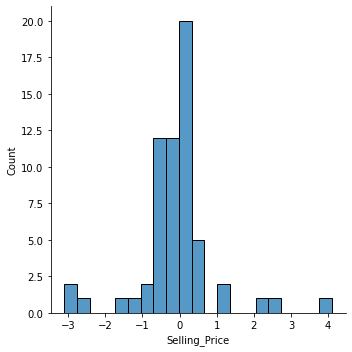

In [58]:
plt.figure(figsize=(8,6))
sns.displot(y_test-pred)
plt.show()

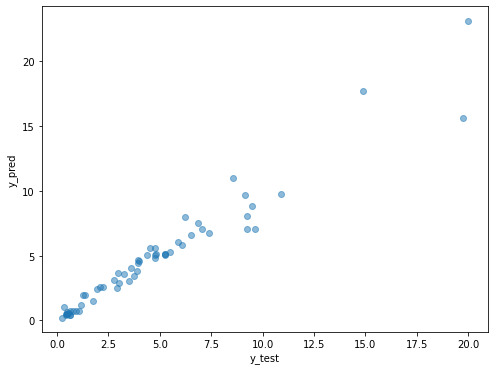

In [59]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,pred,alpha=.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [60]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test, pred))
print('MSE:',metrics.mean_squared_error(y_test, pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.6236243381962825
MSE: 1.0953641206649296
RMSE: 1.0465964459451071


In [61]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.9389033229908529

In [62]:
import statsmodels.api as sm

In [63]:
OLSsm=sm.OLS(y_train,sm.add_constant(x_train)).fit()
OLSsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     220.7
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.24e-103
Time:                        10:33:39   Log-Likelihood:                -480.47
No. Observations:                 240   AIC:                             978.9
Df Residuals:                     231   BIC:                             1010.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.2640      1.886      2.791      0.006       1.547       8.981
Present_Price              0.4357      0.017     25.016      0.000       0.401       0.470
Kms_Driven             -5.628e-06   3.46e-06     -1.625      0.105   -1.25e-05    1.19e-06
Owner                     -0.8469      0.478     -1.772      0.078      -1.789       0.095
No_of_years               -0.4351      0.051     -8.454      0.000      -0.536      -0.334
Fuel_Type_Diesel           2.8735      1.854      1.550      0.123      -0.779       6.526
Fuel_Type_Petrol           0.7900      1.837      0.430      0.668      -2.830       4.410
Seller_Type_Individual    -1.0945      0.292     -3.750      0.000      -1.669      -0.519
Transmission_Manual       -1.4212      0.369     -3.850      0.000      -2.148      -0.694
==============================================================================
Omnibus:                       72.553   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              483.814
Skew:                           0.992   Prob(JB):                    8.73e-106
Kurtosis:                       9.666   Cond. No.                     1.52e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""